## Problem 2: Investigating a time-varying criminal network

In this problem, you will study a time-varying criminal network that is repeatedly disturbed by police forces. The data for this problem can be found in the CAVIAR directory of the data archive.

The CAVIAR investigation lasted two years and ran from 1994 to 1996. The operation brought together investigation units of the Montréal police and the Royal Canadian Mounted Police of Canada. During this two year period, 11 wiretap warrants, valid for a period of about two months each, were obtained (the 11 matrices contained in `phase1.csv, phase2.csv, ...` correspond to these eleven, two month wiretap phases).

This case is interesting because, unlike other investigative strategies, the mandate of the CAVIAR project was to seize the drugs without arresting the perpetrators. During this period, imports of the trafficking network were hit by the police on eleven occasions. The arrests took place only at the end of the investigation. Monetary losses for traffickers were estimated at 32 million dollars. Eleven seizures took place throughout the investigation. Some phases included no seizures, and others included multiple. The following summarizes the 11 seizures:

Phase | # of seizures | Money | Drug Amount
----- | ------------- | ----- | -----------
Phase 4 | 1 seizure | $2,500,000 | 300 kg of marijuana
Phase 6 | 3 seizures | $1,300,000 | 2 x 15 kg of marijuana + 1 x 2 kg of cocaine
Phase 7 | 1 seizure | $3,500,000 | 401 kg of marijuana
Phase 8 | 1 seizure | $360,000 | 9 kg of cocaine
Phase 9 | 2 seizures | $4,300,000 | 2 kg of cocaine + 1 x 500 kg marijuana
Phase 10 | 1 seizure | $18,700,000 | 2200 kg of marijuana
Phase 11 | 2 seizures | $1,300,000 | 12 kg of cocaine + 11 kg of cocaine

This case offers a rare opportunity to study a criminal network in upheaval from police forces. This allows us to analyze changes in the network structure and to survey the reaction and adaptation of the participants while they were subjected to an increasing number of distressing constraints.

The network consists of 110 (numbered) players. Players 1-82 are the traffickers. Players 83-110 are the non-traffickers (financial investors; accountants; owners of various importation businesses, etc.). Initially, the investigation targeted Daniel Serero, the alleged mastermind of a drug network in downtown Montréal, who attempted to import marijuana to Canada from Morocco, transiting through Spain. After the first seizure, happening in Phase 4, traffickers reoriented to cocaine import from Colombia, transiting through the United States.

According to the police, the role of 23 of the players in the “Serero organization" are the following, listed by name (unique id):

* Daniel Serero (n1) : Mastermind of the network.

* Pierre Perlini (n3) : Principal lieutenant of Serero, he executes Serero's instructions.

* Alain (n83) and Gérard (n86) Levy : Investors and transporters of money.

* Wallace Lee (n85) : Takes care of financial affairs (accountant).

* Gaspard Lino (n6): Broker in Spain.

* Samir Rabbat (n11): Provider in Morocco.

* Lee Gilbert (n88): Trusted man of Wallace Lee (became an informer after the arrest).

* Beverly Ashton (n106): Spouse of Lino, transports money and documents.

* Antonio Iannacci (n89): Investor.

* Mohammed Echouafni (n84): Moroccan investor.

* Richard Gleeson (n5), Bruno de Quinzio (n8) and Gabrielle Casale (n76) : Charged with recuperating the marijuana.

* Roderik Janouska (n77): Individual with airport contacts.

* Patrick Lee (n87): Investor.

* Salvatore Panetta (n82): Transport arrangements manager.

* Steve Cunha (n96): Transport manager, owner of a legitimate import company (became an informer after the arrest).

* Ernesto Morales (n12): Principal organizer of the cocaine import, intermediary between the Colombians and the Serero organization.

* Oscar Nieri (n17): The handyman of Morales.

* Richard Brebner (n80): Was transporting the cocaine from the US to Montréal.

* Ricardo Negrinotti (n33): Was taking possession of the cocaine in the US to hand it to Brebner.

* Johnny Pacheco (n16): Cocaine provider.

In the data files (`phase1.csv, phase2.csv, ...`), you will find matrices that report the number of wiretapped correspondences between the above players in the network, where players are identified by their unique id. You will be analyzing this time-varying network, giving a rough sketch of its shape, its evolution and the role of the actors in it.

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import pprint
import matplotlib.pyplot as plt
from typing import List, Union, Dict, Tuple

# Instantiate a pretty printer
pp = pprint.PrettyPrinter(indent=4)

In [2]:
phases = {}
G = {}

# Load the data from the internet
for i in range(1,12): 

    # Build the file name
    var_name = "phase" + str(i)
    file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"

    # Load and properly parse the data
    phases[i] = pd.read_csv(file_name, index_col = ["players"])
    phases[i].columns = "n" + phases[i].columns
    phases[i].index = phases[i].columns
    phases[i][phases[i] > 0] = 1

    # Turn the generated pandas dataframe into a networkx graph
    G[i] = nx.from_pandas_adjacency(phases[i])
    G[i].name = var_name

### Part (a): Question 1

{   1: {'edges': 18, 'nodes': 15},
    2: {'edges': 28, 'nodes': 24},
    3: {'edges': 56, 'nodes': 33},
    4: {'edges': 48, 'nodes': 33},
    5: {'edges': 39, 'nodes': 32},
    6: {'edges': 47, 'nodes': 27},
    7: {'edges': 49, 'nodes': 36},
    8: {'edges': 58, 'nodes': 42},
    9: {'edges': 44, 'nodes': 34},
    10: {'edges': 50, 'nodes': 42},
    11: {'edges': 50, 'nodes': 41}}


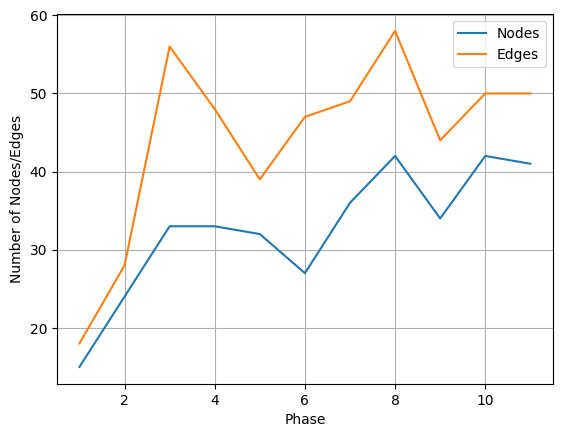

In [3]:
# Get the number of nodes and edges at each phase
# (Range skips the last element, so we add 1 to include the last phase)
phases = list(range(1, len(G) + 1))

# Get the number of nodes and edges at each phase
phase_nodes: List[int] = [G[i].number_of_nodes() for i in phases]
phase_edges: List[int] = [G[i].number_of_edges() for i in phases]

# Create a dictionary where the key consists of the phase and the value is 
# a dictionary with one key for the number of nodes and one for the number of edges
phase_dict: Dict[int, Dict[str, int]] = {
    i: {
        "nodes": phase_nodes[i-1], 
        "edges": phase_edges[i-1]
    } for i in phases
}
pp.pprint(phase_dict)

# Plot the number of nodes and edges at each phase
plt.plot(phases, phase_nodes, label = "Nodes")
plt.plot(phases, phase_edges, label = "Edges")
plt.xlabel("Phase")
plt.ylabel("Number of Nodes/Edges")
plt.grid()
plt.legend()
plt.show()

### Part (a): Question 2

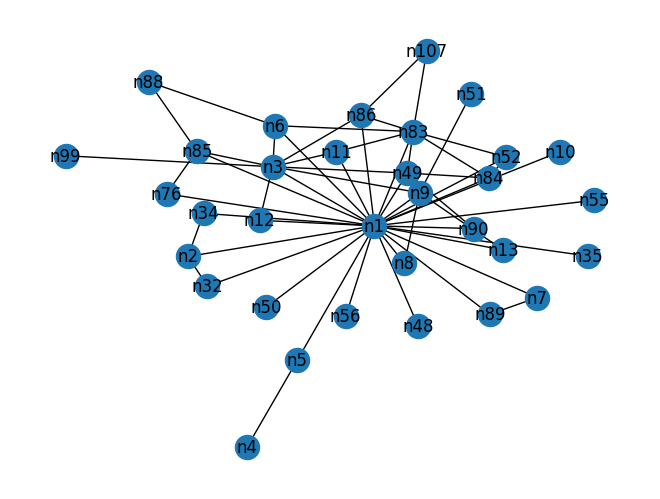

In [12]:
# Visualize the graph at phase 3
# (The course suggests using pygraphviz, but it was way too difficult to install)
nx.draw(G[3], with_labels = True)

### Part (b): Question 1

The normalized degree centrality of node $i$ is defined as

$$
\displaystyle  \tilde{k}_ i
\displaystyle = \frac{k_ i}{n-1},
$$

where $k_i$ is the degree of node $i$ and $n$ is the number of nodes in the network. You can compute the normalized degree centrality using the function `nx.degree_centrality(G)`.

In [16]:
# Compute the degree centrality for the following nodes
nodes_of_interest = ["n1", "n3", "n12", "n83"]

# Get the degree centrality in phase 3 and 9
phase3_degree_centrality = nx.degree_centrality(G[3])
phase9_degree_centrality = nx.degree_centrality(G[9])

# Create a dictionary where the key consists of the node of interest
# and the value is a dictionary with one key for the degree centrality in phase 3
# and one for the degree centrality in phase 9
degree_centrality_dict: Dict[str, Dict[int, float]] = {
    node: {
        3: phase3_degree_centrality[node],
        9: phase9_degree_centrality[node]
    } for node in nodes_of_interest
}
print("Degree Centrality")
pp.pprint(degree_centrality_dict)

Degree Centrality
{   'n1': {3: 0.84375, 9: 0.30303030303030304},
    'n12': {3: 0.0625, 9: 0.24242424242424243},
    'n3': {3: 0.28125, 9: 0.33333333333333337},
    'n83': {3: 0.25, 9: 0.030303030303030304}}


### Part (b): Question 2

For each of the 11 phases and for each of the players under investigation, compute and list the normalized betweenness centrality of the player.

For undirected graphs, the normalized betweenness centrality for node $i$ is defined as

$$
\displaystyle  \tilde{B}_ i = \frac{2}{(n-1)(n-2)} \sum _{s\neq i\neq t} \frac{n^ i_{st}}{g_{st}},
$$

where $n^i_{st}$ is the number of shortest paths between $s$ and $t$ that pass through $i$ and $g_{st}$ is the total number of shortest paths between $s$ and $t$. Note that this considers both orderings of each pair of nodes, so for undirected graphs, a path counts twice (as it counts both for $n^i_{st}$ and for $n^i_{ts}$.

You can compute the normalized betweenness centrality using the function `nx.betweenness_centrality(G, normalized=True)`.

In [18]:
# Get the betweenness centrality in phase 3 and 9
phase3_betweenness_centrality = nx.betweenness_centrality(G[3], normalized=True)
phase9_betweenness_centrality = nx.betweenness_centrality(G[9], normalized=True)

# Create a dictionary where the key consists of the node of interest
# and the value is a dictionary with one key for the betweenness centrality in phase 3
# and 9
betweenness_centrality_dict: Dict[str, Dict[int, float]] = {
    node: {
        3: phase3_betweenness_centrality[node],
        9: phase9_betweenness_centrality[node]
    } for node in nodes_of_interest
}
pp.pprint(betweenness_centrality_dict)

{   'n1': {3: 0.829502688172043, 9: 0.2490530303030303},
    'n12': {3: 0.0, 9: 0.3573232323232323},
    'n3': {3: 0.09549731182795697, 9: 0.5762310606060607},
    'n83': {3: 0.046572580645161295, 9: 0.0}}


### Part (b): Question 3

For each of the 11 phases and for each of the players under investigation, compute and list the eigenvector centrality of the player.

Ensure your eigenvector centrality is normalized as

$$
\sqrt{\sum _ i v_ i^2} = 1.
$$ 

You can compute the eigenvector centrality using the function `nx.eigenvector_centrality(G)`.

In [19]:
# Get the eigenvector centrality in phase 3 and 9
phase3_eigenvector_centrality = nx.eigenvector_centrality(G[3])
phase9_eigenvector_centrality = nx.eigenvector_centrality(G[9])

# Create a dictionary where the key consists of the node of interest
# and the value is a dictionary with one key for the eigenvector centrality in phase 3
# and 9
eigenvector_centrality_dict: Dict[str, Dict[int, float]] = {
    node: {
        3: phase3_eigenvector_centrality[node],
        9: phase9_eigenvector_centrality[node]
    } for node in nodes_of_interest
}
pp.pprint(eigenvector_centrality_dict)

{   'n1': {3: 0.5938791958045414, 9: 0.4589575176167989},
    'n12': {3: 0.13599046901759537, 9: 0.14065936326685183},
    'n3': {3: 0.29130488767289103, 9: 0.4679877147323067},
    'n83': {3: 0.2774973009007579, 9: 0.09178102356758051}}


### Part (b): Question 4

Recall the mathematical definition of each of these metrics, along with the algorithm that is best suited to compute it and the corresponding time complexity.

Which algorithm is the fastest for this data set?

In [24]:
# Time the execution of the code
from timeit import timeit

# Time the execution of each code snippet after running it 1000 times
dc = timeit("nx.degree_centrality(G[3])", globals=globals(), number=1000)
bc = timeit("nx.betweenness_centrality(G[3], normalized=True)", globals=globals(), number=1000)
ec = timeit("nx.eigenvector_centrality(G[3])", globals=globals(), number=1000)

# Display the results of the timing 
print("Runtime")
print("- Degree Centrality: ", dc, "s")
print("- Betweenness Centrality: ", bc, "s")
print("- Eigenvector Centrality: ", ec, "s")

# Conclusion:
# - The betweenness centrality is probably the most time consuming to compute since it
#   first requires the computation of the shortest paths between all pairs of nodes followed
#   by the actual computation of the betweenness centrality
# - The eigenvector centrality requires the computation of the eigenvalues and eigenvectors
#   of the adjacency matrix, which can be time consuming depending on the matrix size.
# - The degree centrality can be calculated by summing the number of edges for each node, and
#   dividing by the number of nodes. 

Runtime
- Degree Centrality:  0.007873600000039005 s
- Betweenness Centrality:  1.5294637000001785 s
- Eigenvector Centrality:  0.5312893000000258 s


### Part (b): Question 5

The data from questions 1 to 3 can be used to perform different types of quantitative analyses. In this question we will look at performing one such analysis - we will determine the temporal consistency of a player's centrality , i.e. which players consistently remained active and central throughout most of the phases and which didn't?

To answer this question, look at the temporal evolution of the networks and calculate the mean centrality for each of the centrality metrics, across all phases, for every player.

In [30]:
# =========== BETWEENNESS CENTRALITY =========== #

# Calculate the betweenness centrality for each phase
betweenness_centrality = {
    i: nx.betweenness_centrality(G[i], normalized=True) for i in phases
}

# Number of nodes (players) in the network
num_players = 110

# Average the betweenness centrality for each player across all phases
average_betweenness = {}
for i in range(num_players):

    # Create a key for each player (n1, n2, n3, ...)
    player_name = "n" + str(i+1)

    # Initialize the betweenness centrality to 0
    average_betweenness[player_name] = 0

    # Add up the betweenness centrality for each phase
    for phase in phases:
        if player_name not in betweenness_centrality[phase]:
            average_betweenness[player_name] += 0
        else:
            average_betweenness[player_name] += betweenness_centrality[phase][player_name]
        
    # Divide by the number of phases to get the average
    average_betweenness[player_name] /= len(phases)

# Sort the average betweenness centrality in descending order
# (x[1] refers to the betweenness centrality value)
sorted_average_betweenness = sorted(
    average_betweenness.items(), 
    key=lambda x: x[1], 
    reverse=True
)

# Print the top 3 players with the highest average betweenness centrality
print("Top 3 Players with Highest Average Betweenness Centrality")
pp.pprint(sorted_average_betweenness[:3])


# =========== EIGENVECTOR CENTRALITY =========== #

# Calculate the eigenvector centrality for each phase
eigenvector_centrality = {
    i: nx.eigenvector_centrality(G[i]) for i in phases
}

# Average the eigenvector centrality for each player across all phases
average_eigenvector = {}
for i in range(num_players):

    # Create a key for each player (n1, n2, n3, ...)
    player_name = "n" + str(i+1)

    # Initialize the eigenvector centrality to 0
    average_eigenvector[player_name] = 0

    # Add up the eigenvector centrality for each phase
    for phase in phases:
        if player_name not in eigenvector_centrality[phase]:
            average_eigenvector[player_name] += 0
        else:
            average_eigenvector[player_name] += eigenvector_centrality[phase][player_name]
        
    # Divide by the number of phases to get the average
    average_eigenvector[player_name] /= len(phases)

# Sort the average eigenvector centrality in descending order
# (x[1] refers to the eigenvector centrality value)
sorted_average_eigenvector = sorted(
    average_eigenvector.items(),
    key=lambda x: x[1],
    reverse=True
)

# Print the top 3 players with the highest average eigenvector centrality
print()
print("Top 3 Players with Highest Average Eigenvector Centrality")
pp.pprint(sorted_average_eigenvector[:3])


Top 3 Players with Highest Average Betweenness Centrality
[   ('n1', 0.655050992293228),
    ('n12', 0.16756212382251084),
    ('n3', 0.12940285961873224)]
